# H_23092024

In [7]:
import pandas as pd
import numpy as np
import MetaTrader5 as mt5
import pytz
from datetime import datetime
import matplotlib.pyplot as plt
import json
import plotly.express as px
import plotly.graph_objects as go

In [8]:
ticker = "NQ_Z"
start_dt = "2024-09-19"
end_dt = "2024-09-19"

<Axes: xlabel='time'>

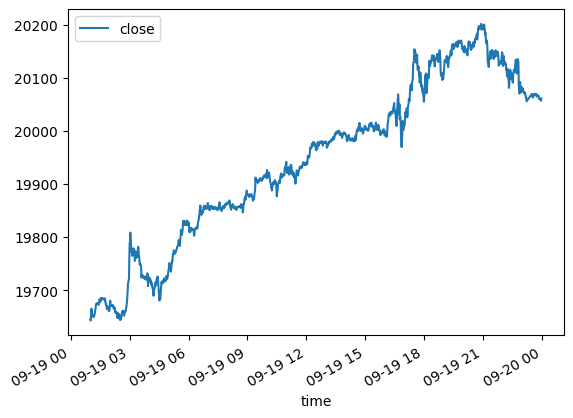

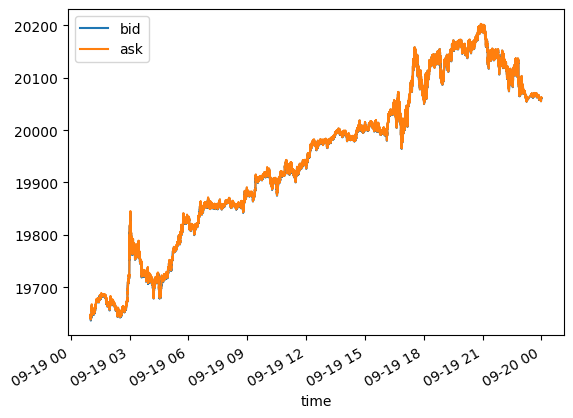

In [24]:
def data_from_mt5():
    # connect to MetaTrader 5
    if not mt5.initialize():
        print("initialize() failed")
        mt5.shutdown()

    # set time zone to UTC
    timezone = pytz.timezone("Etc/UTC")

    utc_from = datetime(2024, 9, 19, 0, 0, 0, tzinfo=timezone)
    utc_to = datetime(2024, 9, 19, 23, 59, 59, tzinfo=timezone)

    m1day = mt5.copy_rates_range(ticker, mt5.TIMEFRAME_M1, utc_from, utc_to)
    tickday = mt5.copy_ticks_range(ticker, utc_from, utc_to, mt5.COPY_TICKS_ALL)

    mt5.shutdown()

    m1df = pd.DataFrame(m1day)
    m1df['time']=pd.to_datetime(m1df['time'], unit='s')
    m1df = m1df.set_index('time')
    del m1df['real_volume']
    del m1df['spread']

    
    tickdf = pd.DataFrame(tickday)
    tickdf['time']=pd.to_datetime(tickdf['time'], unit='s')
    tickdf = tickdf.set_index('time')
    del tickdf['last']
    del tickdf['flags']
    del tickdf['volume']
    del tickdf['time_msc']
    del tickdf['volume_real']

    return m1df, tickdf

m1, tick = data_from_mt5()

m1
fig = go.Figure(data=go.Ohlc(x=m1.index, 
                             open=m1['open'], 
                             high=m1['high'], 
                             low=m1['low'], 
                             close=m1['close'])) 
  
# show the figure 
#fig.show()
m1.plot.line(y='close')
tick.plot() 